# Project: Investigating the Medical Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

### Question(s) for Analysis
##### Question 1 : Is the average of age differes for show/no show ?
##### Question 2 : Are SMS notifications associated with lowered incidences of No Shows ?
##### Question 3 : Are there any differance of No Shows on differant days of the week?

In [70]:
# Load the needed pakages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime as dt

<a id='wrangling'></a>
## Data Wrangling

> **Loading the data and show a few rows**



In [71]:
# Reading the row data file and load the first few raws
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [72]:
# Take a look at date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Observations on row data

There is no missing data on any column

**PatientId** column is float64 and should be changed to an integer

**ScheduledDay** and AppointmentDay need to change type as date time

**AppointmentDay** has no specified hours all appear (00:00:00) so we will not be able to analyze it if it has relation to no show

In many cases, there is a difference between **ScheduledDay** and **AppointmentDay** so we need to add a column to check the difference



## Data Cleaning


In [73]:
# Changing the columns headers
df.columns = (['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day','age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'])

In [74]:
# Changing patient_id to integer
df.patient_id = df.patient_id.astype('int64')

In [75]:
# Changing scheduled_day and appointment_day to DateTime
df.scheduled_day = pd.to_datetime(df.scheduled_day)
df.appointment_day = pd.to_datetime(df.appointment_day)

In [76]:
# Create a column for the difference between scheduled an appointment
df['awaiting_days'] = (df.appointment_day-df.scheduled_day).dt.days
df['appointment_day'] = df.scheduled_day.dt.day_name()
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,awaiting_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


In [90]:
# Count of the unique patient and unique appointments
len(df.patient_id.unique()),len(df.appointment_id.unique())

(62299, 110527)

In [78]:
# To get the percentage of two numbers
def portion(a,b):
    return (a/b)    

In [79]:
# getting the percentage of unique patients from appointments
portion(len(df.patient_id.unique()),len(df.appointment_id.unique()))

0.5636541297601491

Almost every patient has two appointments

In [80]:
# Top 10 patients with multiple appointments
df.patient_id.value_counts().iloc[0:10]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
6264198675331      62
258424392677       62
871374938638855    62
75797461494159     62
66844879846766     57
872278549442       55
Name: patient_id, dtype: int64

## Additional Observations
The **Age** mean is 37 years

The **awaiting days**(difference between the appointment day and the scheduled day) mean was more than 9 days and 75% of patients waited for 14 days 

The **appointment id** is more than **patient id** by around double that means patients has more than one appointment and above listed the highest 10 patient ids had appointments


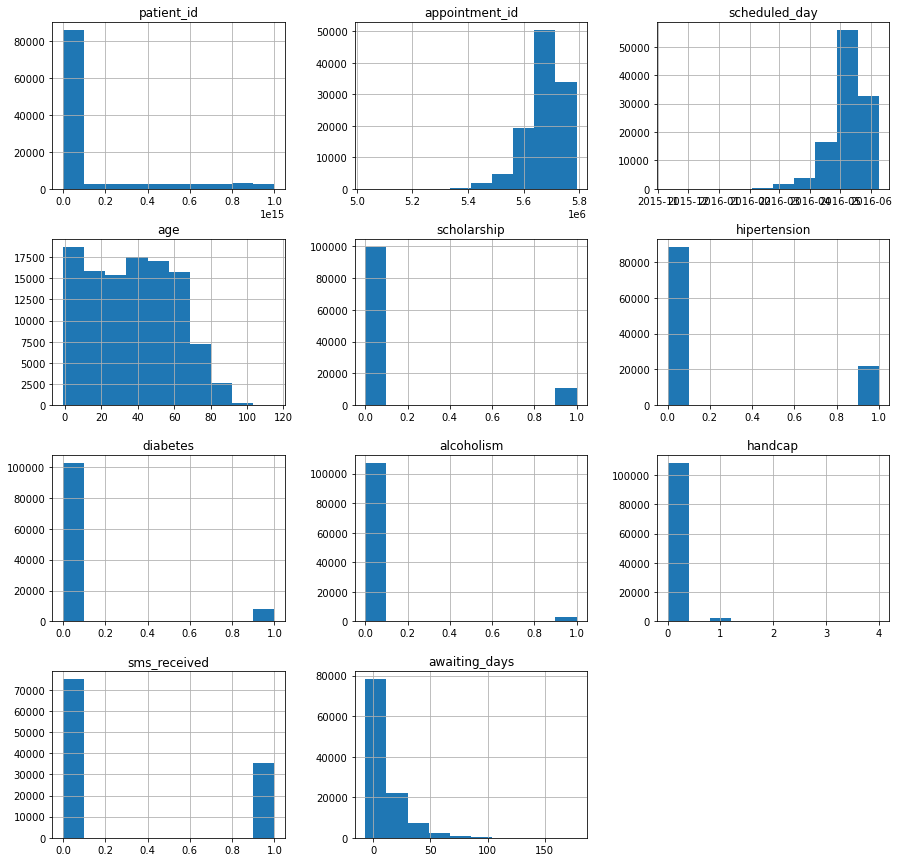

In [81]:
# Drow histogram for the different variables
df.hist(figsize=(15,15));

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. 

In [82]:
# Take a look on data
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,awaiting_days
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


First, let's see the % of no show patients 

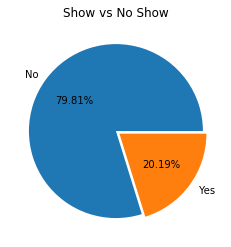

In [65]:
# Drow a figure to take a look at the show no show percentage
plt.pie(df.no_show.value_counts(),labels=('No',' Yes'),autopct='%.2f%%', explode=(0, .05));
plt.title('Show vs No Show');

The figure above shows that just 20% of appointments are no show and the rest attended 

##### Question 1 : Is the average of age differes for show/no show ?

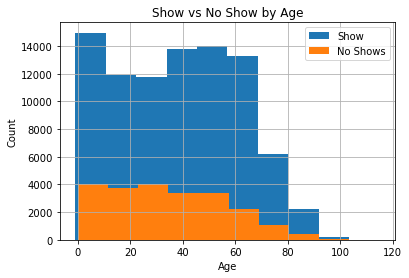

Show Mean Age:37.79
No show Mean Age:34.32


In [83]:
# Drow a figure to take a look at the show no show percentage by age
show_ = df.query('no_show == "No"')
no_show_ = df.query('no_show == "Yes"')
show_.age.hist();
no_show_.age.hist();
plt.legend(['Show', 'No Shows'])
plt.title('Show vs No Show by Age');
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print('Show Mean Age:{:.2f}'.format(show_.age.mean()))
print('No show Mean Age:{:.2f}'.format(no_show_.age.mean()))

The average of no show patients is less than the average of show patients by more than 3 years and the peak was at 60 years 

##### Question 2 : Are SMS notifications associated with lowered incidences of No Shows ?

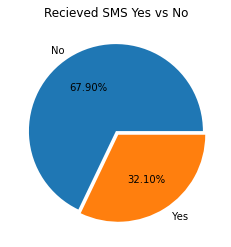

In [84]:
# Drow a figure to take a look at the percentage of received SMS
plt.pie(df.sms_received.value_counts(),labels=('No',' Yes'),autopct='%.2f%%', explode=(0, .05));
plt.title('Recieved SMS Yes vs No');

Just 32% of patients received SMS notification lets see the % on show/no show

In [85]:
# Replacing SMS received 0 and 1 by no and yes
df.sms_received.replace(to_replace=[0,1],value=['No','Yes'],inplace=True)

In [86]:
# Group by no show and received SMS
df.groupby('no_show').sms_received.value_counts().to_frame()

sms_received
no_show sms_received              
No      No                   62510
        Yes                  25698
Yes     No                   12535
        Yes                   9784

The majority of show patients didn't receive SMS  

##### Question 3 : Are there any differance of No Shows on differant days of the week? 

In [87]:
# Count appointments on each day
df.appointment_day.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Tuesday,26168
Wednesday,24262
Monday,23085
Friday,18915
Thursday,18073
Saturday,24


In [88]:
# Count no show appointments on each day
no_show_.appointment_day.value_counts().to_frame(name='Number of Appointments')

,Number of Appointments
Tuesday,5291
Wednesday,4879
Monday,4561
Friday,3887
Thursday,3700
Saturday,1


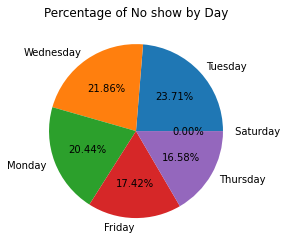

In [89]:
# Drow a figure to take a look at the show no show percentage on each week day
plt.pie(no_show_.appointment_day.value_counts(),labels=(['Tuesday','Wednesday','Monday','Friday','Thursday',' Saturday']),autopct='%.2f%%');
plt.title('Percentage of No show by Day');

It appears that Tuesday and Wednesday are the peaks of the week and Thursday, Friday, and Saturday are the least

<a id='conclusions'></a>
## Conclusions

After exploring the dataset and wrangling data, adding new features based on existing data. I have investigated three independent variables in the dataset and made a few observations. As this was only an exploratory analysis. There was a small but statistically significant difference in average age between patients who missed their appointments and those who did not. In addition, certain days of the week were linked to higher occurrences of no-shows.

The most important findings are:

Appointments distribution among days of the week (Monday-Friday) was almost equal with a little bit fewer visits on Thursday and Friday. Rare visits on Saturday and none on Sunday.

On average patients awaited  9 days for an appointment. 50% of patients waited up to 3 days and 75% up to 14 days for an appointment. The longest waiting time was 178 days.

The average age of patients is 37 years. 25% of patients are below 18 and 75% of them are below 55.

Most of the patients are not (alcoholics or diabetes or handicapped or hypertension)


There are many patients with multiple appointments. The number of appointments of the top 10 patients ranges from 88 to 55. 

Almost all categorical variables the distributions of show/no-show for different categories look very similar. There is no clear indication of any of these variables having a bigger than others impact on show/no-show characteristics. The charts confirm about a 20% no-show rate for most categories.


### Limitations
One of the limitations of this analysis is the need for further deep information. For example in the analysis above found that only 32% of the appointments had received SMS messages. Maybe patients were more likely to be encouraged to enroll in SMS notifications after they have already missed an appointment. That would mean that those who were receiving SMSs were also more likely to have problems making appointments. Also, there was no information about the hospitals and the ability to absorb a sufficient number of patients.

An area for further research could be looking for trends in patients with multiple appointments and analyzing if SMSes are being used each time the patient has an appointment or not.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])